In [136]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [137]:
# Loading in the dataset

df = pd.read_csv("Train_primo.csv")

In [138]:
df.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,1/8/2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [140]:
# Changing date_customer to datetime

df["Date_Customer"] = pd.to_datetime(df["Date_Customer"])

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1568 non-null   object        
 1   Year_of_Birth            1568 non-null   int64         
 2   Education_Level          1568 non-null   object        
 3   Marital_Status           1568 non-null   object        
 4   Disposable_Income        1552 non-null   float64       
 5   No_of_Kids_in_home       1568 non-null   int64         
 6   No_of_Teen_in_home       1568 non-null   int64         
 7   Date_Customer            1568 non-null   datetime64[ns]
 8   Recency                  1568 non-null   int64         
 9   Discounted_Purchases     1568 non-null   int64         
 10  WebPurchases             1568 non-null   int64         
 11  CatalogPurchases         1568 non-null   int64         
 12  StorePurchases           1568 non-

In [142]:
# Feature_creation and clustering

df.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,29.091199,168.376276,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,39.565637,233.419980,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,36.000000,232.000000,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
# Resizing the columns

pd.options.display.max_columns=50
df.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [144]:
# Checking the columns
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response'],
      dtype='object')

### **Description**

ID: Unique identifier for each User
•	Year_of_Birth: Year of birth\
•	Education_Level: The highest level of education attained by the User\
•	Marital_Status: Marital status\
•	Disposable_Income: Yearly User’s household disposable income\
•	No_of_Kids_in_home: total count of children in the user’s home\
•	No_of_Teen_in_home: Number of teenagers in the User's household\
•	Date_Customer: Date of User's enrollment with the company\
•	Recency: Number of days since User's last purchase\
•	Discounted_Purchases: Counts of purchases made by the user using coupons\
•	WebPurchases: Counts of purchases made by the user through the company’s website\
•	CatalogPurchases: Counts of purchases made by the user using a catalogue\
•	StorePurchases: Counts of purchases made by the user directly in stores\
•	Amount_on_Wines: Total amount user spent on wine and drinks within the last 3 years\
•	Amount_on_Fruits: Total amount user spent on fruity food within the last 3 years\
•	Amount_on_MeatProducts: Total amount user spent on meat products and l\


### Recency, Frequency, Monetary Analysis (To get a final rating using a ranking method)

What does RFM stand for in business?
What is RFM (recency, frequency, monetary) analysis?
RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

In [145]:
df.shape

(1568, 27)

In [146]:
df.duplicated().sum()

0

In [147]:
df.isna().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [148]:
df["Education_Level"].unique()

array(['Graduation', '2n Cycle', 'Master', 'PhD', 'Basic'], dtype=object)

In [149]:
df["Marital_Status"].unique()

array(['Divorced', 'Together', 'Single', 'Married', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [150]:
df["Year_of_Birth"].unique()

array([1955, 1958, 1962, 1979, 1959, 1960, 1953, 1974, 1966, 1975, 1989,
       1956, 1976, 1970, 1965, 1977, 1952, 1981, 1951, 1995, 1973, 1972,
       1971, 1988, 1984, 1990, 1986, 1969, 1900, 1967, 1987, 1992, 1968,
       1963, 1957, 1944, 1961, 1950, 1954, 1982, 1991, 1947, 1985, 1978,
       1980, 1964, 1983, 1949, 1993, 1948, 1994, 1946, 1942, 1945, 1996,
       1997], dtype=int64)

In [151]:
df[df["Disposable_Income"].isnull()]

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
128,ID_2ZFDRTZK,1970,Master,Together,NaN,1,1,2013-05-18,59,7,4,10,4,380,45,48,94,66,96,3,0,0,0,0,0,0,0
155,ID_0Q6ZGI80,1960,PhD,Single,NaN,0,0,2013-05-11,87,1,1,3,4,86,14,50,3,2,39,2,0,0,0,0,0,0,0
166,ID_3RPO0ZH5,1979,2n Cycle,Together,NaN,0,0,2012-12-08,60,0,0,0,1,37,5,1607,12,4,22,0,0,1,0,0,0,0,0
288,ID_LVEIIFN2,1983,Graduation,Single,NaN,1,0,2013-06-17,64,2,2,0,3,16,6,22,2,2,6,6,0,0,0,0,0,0,0
423,ID_LZNSOQRD,1990,Graduation,Married,NaN,0,0,2013-03-06,76,1,6,5,12,866,141,461,60,30,61,3,0,1,0,1,0,0,0
462,ID_EVQSLYK9,1984,Graduation,Married,NaN,1,0,2013-11-15,18,1,1,0,2,10,8,6,0,2,1,7,0,0,0,0,0,0,0
552,ID_B585A0J8,1971,Graduation,Single,NaN,1,2,2013-08-23,74,6,2,3,10,743,23,172,52,50,20,7,0,1,0,1,0,0,0
562,ID_X42EP1QB,1955,Master,Together,NaN,0,1,2013-06-23,90,2,4,1,4,166,3,22,0,0,24,6,0,0,0,0,0,0,0
588,ID_SEOQWEOJ,1973,PhD,Together,NaN,1,0,2014-02-03,24,1,1,0,3,30,4,13,0,0,3,7,0,0,0,0,0,0,0
642,ID_O6ZRF42T,1987,Graduation,Single,NaN,1,0,2013-02-20,26,0,27,0,0,10,4,3,3,263,362,1,0,0,0,0,0,0,0


In [152]:
df['Year_Date'] =  df['Date_Customer'].dt.year

In [153]:
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'Year_Date'],
      dtype='object')

In [154]:
df["Year_Date"].unique()   #dt.month, dt.day_of_the_week

array([2014, 2013, 2012], dtype=int64)

In [155]:
#Extracting months from date_customer

df["month"] = df["Date_Customer"].dt.month

df["month"].nunique()

12

In [156]:
# Getting months by name #Can pass in locale in the month_name method e.g.dt.month_name(locale="french")

df['month_name'] =  df['Date_Customer'].dt.month_name().str[:3]

df["month_name"].head()

0    Jun
1    Jan
2    Nov
3    Sep
4    Jan
Name: month_name, dtype: object

In [157]:
# Getting day of the week
#Monday = 0    Sunday = 6
df["Weekday"] = df["Date_Customer"].dt.weekday    


df["Weekday"].unique()

array([6, 1, 3, 4, 0, 2, 5], dtype=int64)

In [158]:
# Day of the week in words

df["Weekday_name"] = df["Date_Customer"].dt.day_name()
df["Weekday_name"].unique()

array(['Sunday', 'Tuesday', 'Thursday', 'Friday', 'Monday', 'Wednesday',
       'Saturday'], dtype=object)

In [159]:
# Check if it's month end

df["month_end"] = df["Date_Customer"].dt.is_month_end
df["month_end"].value_counts()

False    1513
True       55
Name: month_end, dtype: int64

In [160]:
df[["Date_Customer", "month_end"]].sample(10)

,Date_Customer,month_end
892,2013-03-20,False
974,2013-12-17,False
556,2013-03-08,False
885,2013-10-16,False
338,2014-06-16,False
482,2013-12-29,False
174,2012-06-10,False
1455,2014-06-15,False
607,2012-09-12,False
561,2013-02-13,False


In [161]:
df[df["Year_Date"] == 2012][["Date_Customer", "month_end"]]

,Date_Customer,month_end
6,2012-11-27,False
11,2012-10-08,False
12,2012-11-18,False
13,2012-10-29,False
14,2012-09-11,False
...,...,...
1529,2012-07-31,True
1530,2012-09-25,False
1531,2012-12-23,False
1545,2012-08-22,False


In [162]:
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'Year_Date', 'month',
       'month_name', 'Weekday', 'Weekday_name', 'month_end'],
      dtype='object')

In [163]:
df["Year_of_Birth"].unique()

array([1955, 1958, 1962, 1979, 1959, 1960, 1953, 1974, 1966, 1975, 1989,
       1956, 1976, 1970, 1965, 1977, 1952, 1981, 1951, 1995, 1973, 1972,
       1971, 1988, 1984, 1990, 1986, 1969, 1900, 1967, 1987, 1992, 1968,
       1963, 1957, 1944, 1961, 1950, 1954, 1982, 1991, 1947, 1985, 1978,
       1980, 1964, 1983, 1949, 1993, 1948, 1994, 1946, 1942, 1945, 1996,
       1997], dtype=int64)

In [164]:
#To get today's date
import datetime as dt
dt.date.today().year #syntax to get today's date

2022

In [165]:
# To get the Age of the customers: Today's date - Year of Birth column
df["Age"] = dt.date.today().year - df['Year_of_Birth']
df[['ID',"Age"]]
#alternative is to hardcode today's date: "2022" - Year Of Birth

,ID,Age
0,ID_4A9AR6FQ,67
1,ID_X28T3VEK,64
2,ID_AWXARH57,60
3,ID_FQVZHE81,43
4,ID_QVLWGPRN,63
...,...,...
1563,ID_XWINUFGG,52
1564,ID_GLVIHZLR,42
1565,ID_O11VSIJY,70
1566,ID_VS37P6MS,58


In [166]:
df.Marital_Status.unique()

array(['Divorced', 'Together', 'Single', 'Married', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [167]:
df.Marital_Status.value_counts()

Married     615
Together    409
Single      329
Divorced    159
Widow        50
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

In [168]:
# Using a conditional statement within a function to create a column(Rel_Status) 
# that re-categorizes Marital_Status column
def Marr_Cat(x): #name of the function - Marr_Cat
    
    if x in ["Married","Together"]:
        result = "In_Relationship"  #Category 1
        return result
    elif x in ["Divorced","Widow"]:
        result = "Not_In_Relationship" #Category 2
        return result
    else:
        result = "Alone" #Category 3
        return result

df["Rel_Status"] = df["Marital_Status"].apply(Marr_Cat)  #applying the function to the Marital Status column
df[["Marital_Status","Rel_Status"]].sample(20) #checking a sample of Marital Status and Rel_Status column

    

,Marital_Status,Rel_Status
398,Together,In_Relationship
597,Together,In_Relationship
114,Together,In_Relationship
1490,Single,Alone
566,Married,In_Relationship
788,Married,In_Relationship
883,Single,Alone
1466,Together,In_Relationship
1275,Single,Alone
23,Single,Alone


In [169]:
#checking the Marital Status and the Rel_Status columns
print(df.Marital_Status.unique())
print('\r')
print(df.Rel_Status.unique())

['Divorced' 'Together' 'Single' 'Married' 'Widow' 'Alone' 'Absurd' 'YOLO']

['Not_In_Relationship' 'In_Relationship' 'Alone']


In [170]:
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'Year_Date', 'month',
       'month_name', 'Weekday', 'Weekday_name', 'month_end', 'Age',
       'Rel_Status'],
      dtype='object')

In [171]:
df.Education_Level.value_counts()

Graduation    802
PhD           340
Master        246
2n Cycle      142
Basic          38
Name: Education_Level, dtype: int64

### Using two methods to create a new column.

**.map method**

In [172]:
Edu_Cat = {"Basic":1,"Graduation":2,"2n Cycle":3,"Master":4,"PhD":5} #creating a dictionary(Key:value)
df["Education_Rank"] = df.Education_Level.map(Edu_Cat) #map is a default function - map applies Edu_Cat
df[["Education_Level","Education_Rank"]].sample(10) #checking the two relevant columns

,Education_Level,Education_Rank
1465,2n Cycle,3
1260,Graduation,2
886,Graduation,2
999,PhD,5
1220,PhD,5
254,Graduation,2
1048,Master,4
840,2n Cycle,3
732,Graduation,2
300,Graduation,2


**Using lamba function**

In [173]:
# Using a lambda function which loops through the dictionary, applying the value to the key
# Apply function works as a loop(loops through every key to find the corresponding value to assign it)
#Apply function is a function that works with another function
Edu_Cat = {"Basic":1,"Graduation":2,"2n Cycle":3,"Master":4,"PhD":5} 
df['Education_Rank'] = df['Education_Level'].apply(lambda y: Edu_Cat.get(y)) #.get is a default function; x or y suffices
df[["Education_Level","Education_Rank"]].sample(10)

,Education_Level,Education_Rank
257,Master,4
417,Graduation,2
476,PhD,5
1473,Graduation,2
929,Graduation,2
1083,PhD,5
321,Graduation,2
917,Graduation,2
863,Graduation,2
15,Graduation,2


In [174]:
# example
Edu_Cat.get("Basic")

1

In [175]:
df.sample(10)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Date,month,month_name,Weekday,Weekday_name,month_end,Age,Rel_Status,Education_Rank
594,ID_KCH00OEQ,1991,Graduation,Single,41294.4,1,0,2013-02-13,69,3,5,0,3,57,15,50,4,36,55,9,0,0,0,0,0,0,0,2013,2,Feb,2,Wednesday,False,31,Alone,2
1420,ID_JT1ZC05L,1962,Graduation,Single,55125.6,0,0,2013-03-11,53,2,8,4,6,278,14,178,62,83,29,6,0,0,0,0,0,0,0,2013,3,Mar,0,Monday,False,60,Alone,2
751,ID_LYY3HL4O,1974,2n Cycle,Together,83281.2,0,1,2014-03-23,48,4,4,4,5,404,30,159,58,8,39,2,0,0,0,0,0,0,0,2014,3,Mar,6,Sunday,False,48,In_Relationship,3
1387,ID_UJFM6OUB,1970,Graduation,Married,16854.0,1,0,2014-01-26,31,1,1,0,3,16,3,5,2,1,1,7,0,0,0,0,0,0,0,2014,1,Jan,6,Sunday,False,52,In_Relationship,2
1049,ID_20NIXTKX,1953,Graduation,Together,40082.4,1,1,2013-07-18,67,3,2,1,3,31,5,19,10,5,8,8,0,0,0,0,0,0,0,2013,7,Jul,3,Thursday,False,69,In_Relationship,2
996,ID_XY5YGADW,1987,PhD,Single,83840.4,0,0,2013-02-04,37,1,3,5,8,201,3,512,33,130,54,1,0,0,0,1,0,0,1,2013,2,Feb,0,Monday,False,35,Alone,5
270,ID_QP51VU23,1965,Master,Single,69969.6,0,1,2013-12-01,84,4,2,6,3,696,3,69,10,0,130,8,0,0,0,0,0,0,0,2013,12,Dec,6,Sunday,False,57,Alone,4
481,ID_062F4UY8,1970,Master,Married,50602.8,1,1,2013-10-19,27,2,1,0,3,24,3,9,0,0,2,8,0,0,0,0,0,0,0,2013,10,Oct,5,Saturday,False,52,In_Relationship,4
803,ID_X1RGC51C,1975,Graduation,Together,57823.2,1,0,2014-03-20,46,3,4,1,4,102,6,66,12,7,34,7,0,0,0,0,0,0,0,2014,3,Mar,3,Thursday,False,47,In_Relationship,2
1535,ID_C71D35GG,1985,Graduation,Married,38113.2,1,0,2014-05-04,103,2,3,0,4,24,4,20,16,14,28,5,0,0,0,0,0,0,0,2014,5,May,6,Sunday,False,37,In_Relationship,2


In [176]:
df.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Date,month,Weekday,Age,Education_Rank
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,29.091199,168.376276,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423,2013.019133,6.568878,3.087372,51.926658,3.030612
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,39.565637,233.419980,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546,0.685070,3.518441,2.018585,11.920781,1.277794
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,0.000000,25.000000,1.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.000000,1.000000,43.000000,2.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,7.000000,3.000000,51.000000,2.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,36.000000,232.000000,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,10.000000,5.000000,62.000000,4.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,12.000000,6.000000,122.000000,5.000000


### Questions 
1. How relationship status and disposable income determines spending
2. Let’s see the average disposable income persons from each educational level have
3. Educational status of your customers and how they spend
4. edu level and disp income
5. Age and spending relationship
6. Year of birth and how they spend
7. customers with a Rel Status described as Single or Divorced only.
8. No kids in home and spending.
9. relationship btn income n no. of kids in home

### Replacing the null values in the Disposable Income column with the median according to their education level

#### Subsetting the original dataframe to get records where disposable income is not null

In [177]:
df2 =df[df.notnull()]
df2

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Date,month,month_name,Weekday,Weekday_name,month_end,Age,Rel_Status,Education_Rank
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2014,6,Jun,6,Sunday,False,67,Not_In_Relationship,2
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2013,1,Jan,1,Tuesday,False,64,In_Relationship,2
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,2013,11,Nov,3,Thursday,False,60,Alone,2
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,2013,9,Sep,4,Friday,False,43,Alone,3
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2014,1,Jan,1,Tuesday,False,63,In_Relationship,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,ID_XWINUFGG,1970,Graduation,Married,52893.6,1,1,2014-06-19,24,2,2,0,3,29,4,10,2,0,4,5,0,0,0,0,0,0,0,2014,6,Jun,3,Thursday,False,52,In_Relationship,2
1564,ID_GLVIHZLR,1980,Graduation,Single,74190.0,0,1,2013-07-08,63,1,4,2,8,167,53,100,55,30,27,4,0,0,0,0,0,0,0,2013,7,Jul,0,Monday,False,42,Alone,2
1565,ID_O11VSIJY,1952,Master,Married,80857.2,0,1,2013-01-15,74,4,2,2,9,820,11,53,11,0,70,7,0,1,0,0,0,0,0,2013,1,Jan,1,Tuesday,False,70,In_Relationship,4
1566,ID_VS37P6MS,1964,PhD,Single,58701.6,1,1,2014-12-04,28,2,1,0,4,57,3,9,0,0,1,4,0,0,0,0,0,0,0,2014,12,Dec,3,Thursday,False,58,Alone,5


Determining the **mean** disposable income based on their educational level and education rank

In [178]:
#mean
df2.groupby(["Education_Level", "Education_Rank"])[["Disposable_Income"]].mean().sort_values("Disposable_Income",ascending=False)

,,Disposable_Income
Education_Level,Education_Rank,
PhD,5,66377.692857
Master,4,63849.029752
Graduation,2,63115.059623
2n Cycle,3,56237.140426
Basic,1,25140.063158


Determining the **median** disposable income based on their educational level and education rank

In [179]:
#median 
df2.groupby(["Education_Level", "Education_Rank"])[["Disposable_Income"]].median().sort_values("Disposable_Income",ascending=False)

,,Disposable_Income
Education_Level,Education_Rank,
PhD,5,65272.8
Graduation,2,61544.4
Master,4,61521.6
2n Cycle,3,55612.8
Basic,1,27014.4


Replacing empty disposable income with the median disposable income based on the educational level and education rank

In [180]:
df["Disposable_Income"].fillna(df2.groupby(["Education_Level", "Education_Rank"])
                               ["Disposable_Income"].transform("median"),inplace=True)
df

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Date,month,month_name,Weekday,Weekday_name,month_end,Age,Rel_Status,Education_Rank
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2014,6,Jun,6,Sunday,False,67,Not_In_Relationship,2
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2013,1,Jan,1,Tuesday,False,64,In_Relationship,2
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,2013,11,Nov,3,Thursday,False,60,Alone,2
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,2013,9,Sep,4,Friday,False,43,Alone,3
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2014,1,Jan,1,Tuesday,False,63,In_Relationship,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,ID_XWINUFGG,1970,Graduation,Married,52893.6,1,1,2014-06-19,24,2,2,0,3,29,4,10,2,0,4,5,0,0,0,0,0,0,0,2014,6,Jun,3,Thursday,False,52,In_Relationship,2
1564,ID_GLVIHZLR,1980,Graduation,Single,74190.0,0,1,2013-07-08,63,1,4,2,8,167,53,100,55,30,27,4,0,0,0,0,0,0,0,2013,7,Jul,0,Monday,False,42,Alone,2
1565,ID_O11VSIJY,1952,Master,Married,80857.2,0,1,2013-01-15,74,4,2,2,9,820,11,53,11,0,70,7,0,1,0,0,0,0,0,2013,1,Jan,1,Tuesday,False,70,In_Relationship,4
1566,ID_VS37P6MS,1964,PhD,Single,58701.6,1,1,2014-12-04,28,2,1,0,4,57,3,9,0,0,1,4,0,0,0,0,0,0,0,2014,12,Dec,3,Thursday,False,58,Alone,5


In [181]:
#sample of a customer whose had no disposable income now assigned a median disposable income 
#df[df["ID"]=="ID_2ZFDRTZK"]

#Questions

1. How relationship status and disposable income determines spending
2. Let’s see the average disposable income persons from each educational level have
3. Educational status of your customers and how they spend
4. Edu level and disp income
5. Age and spending relationship
6. Year of birth and how they spend
7. Customers with a Rel Status described as Single or Divorced only.
8. No kids in home and spending.
9. Relationship btn income n no. of kids in home

In [182]:
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'Year_Date', 'month',
       'month_name', 'Weekday', 'Weekday_name', 'month_end', 'Age',
       'Rel_Status', 'Education_Rank'],
      dtype='object')

<AxesSubplot:>

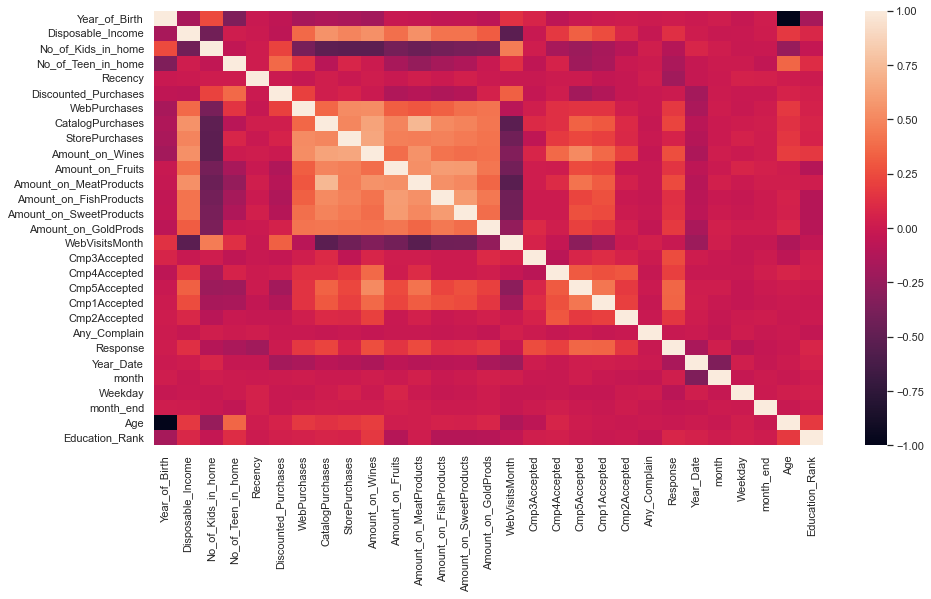

In [183]:
#correlation map for all the columns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr())


In [184]:
#creating a new column for Marital_rank
Mar_Stat = {"In_Relationship":1,"Not_In_Relationship":2,"Alone":3} #creating a dictionary(Key:value)
df["Marital_Rank"] = df["Rel_Status"].map(Mar_Stat) #map is a default function - map applies Edu_Cat
df[["Rel_Status","Marital_Rank"]].sample(10) 

,Rel_Status,Marital_Rank
438,In_Relationship,1
877,In_Relationship,1
11,Alone,3
747,In_Relationship,1
1501,In_Relationship,1
504,In_Relationship,1
1137,In_Relationship,1
812,Not_In_Relationship,2
1030,In_Relationship,1
925,In_Relationship,1


In [186]:
df[['Disposable_Income', 'No_of_Kids_in_home']]

,Disposable_Income,No_of_Kids_in_home
0,77504.4,1
1,56784.0,0
2,103714.8,0
3,46311.6,1
4,87486.0,0
...,...,...
1563,52893.6,1
1564,74190.0,0
1565,80857.2,0
1566,58701.6,1


In [187]:
#creating a new column "Total spending"
df['Total_Spending'] = df['Amount_on_Wines'] + df['Amount_on_Fruits'] + df['Amount_on_MeatProducts'] + df['Amount_on_FishProducts'] + df['Amount_on_SweetProducts'] + df['Amount_on_GoldProds']

In [188]:
df[['Total_Spending']].sample(10)

,Total_Spending
105,32
551,57
94,54
1031,670
1276,774
1262,916
477,63
696,476
626,52
297,48


<AxesSubplot:>

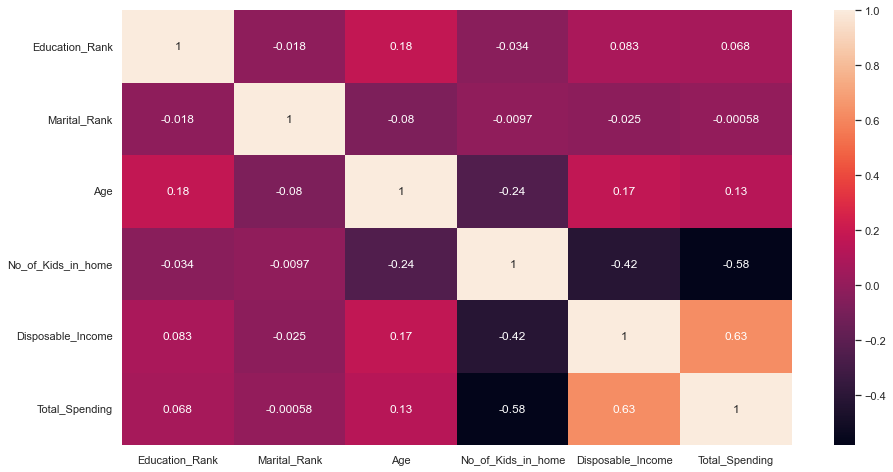

In [190]:
#correlation heat map of specified columns
sns.heatmap(df[['Education_Rank', 'Marital_Rank', 'Age', 'No_of_Kids_in_home','Disposable_Income', 'Total_Spending']]
.corr(), annot=True
)


<AxesSubplot:>

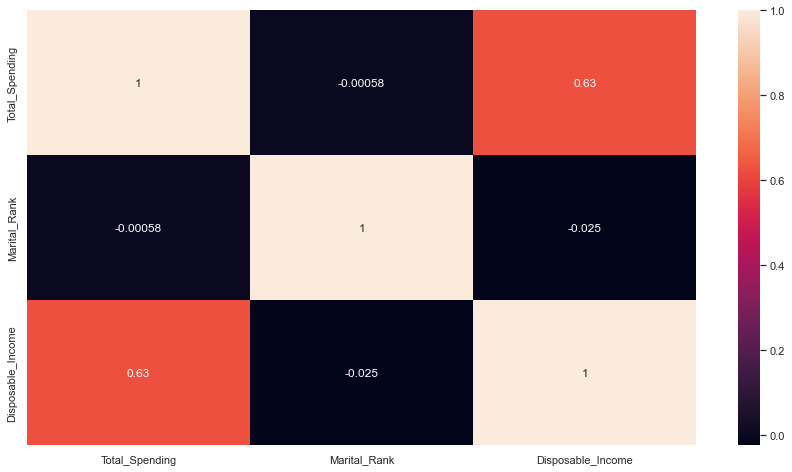

In [189]:
sns.heatmap(df[['Total_Spending', 'Marital_Rank', 'Disposable_Income']]
.corr(), annot=True
)

In [196]:
#removing an outlier
df = df.drop(df[df['Disposable_Income'] == 799999.200000].index)

In [199]:
df.query('Disposable_Income ==799999.200000')


,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Date,month,month_name,Weekday,Weekday_name,month_end,Age,Rel_Status,Education_Rank,Marital_Rank,Total_Spending


<AxesSubplot:xlabel='Disposable_Income', ylabel='Total_Spending'>

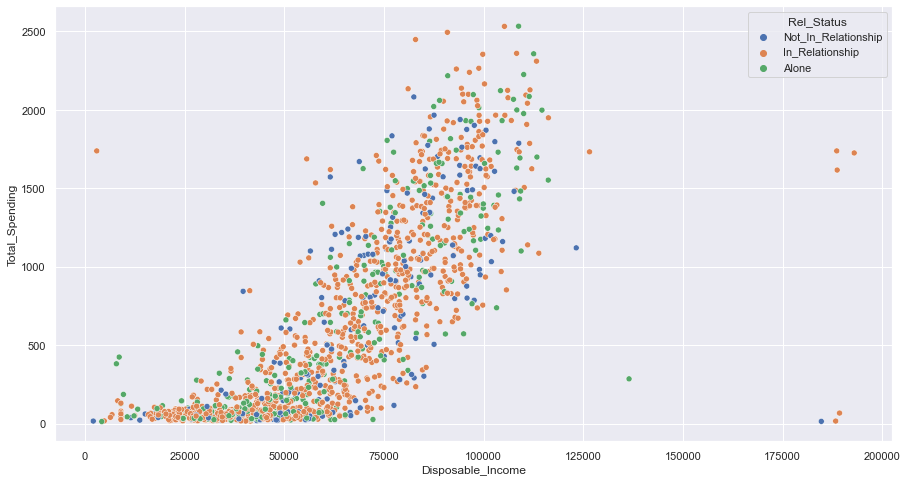

In [208]:
#How relationship status and disposable income determines spending
sns.scatterplot(y= 'Total_Spending', x = 'Disposable_Income', hue = 'Rel_Status', data = df)

<AxesSubplot:xlabel='Disposable_Income', ylabel='Total_Spending'>

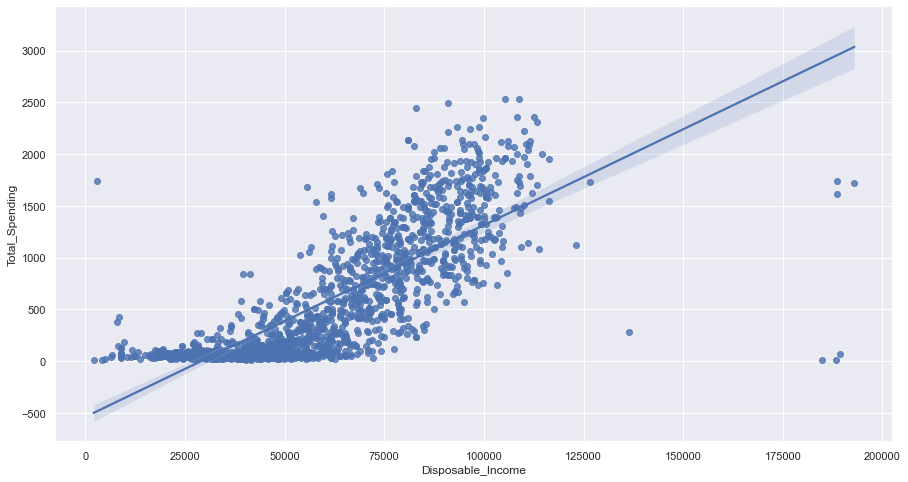

In [205]:
sns.regplot(y= 'Total_Spending', x = 'Disposable_Income', data = df )

<AxesSubplot:xlabel='Education_Rank', ylabel='Total_Spending'>

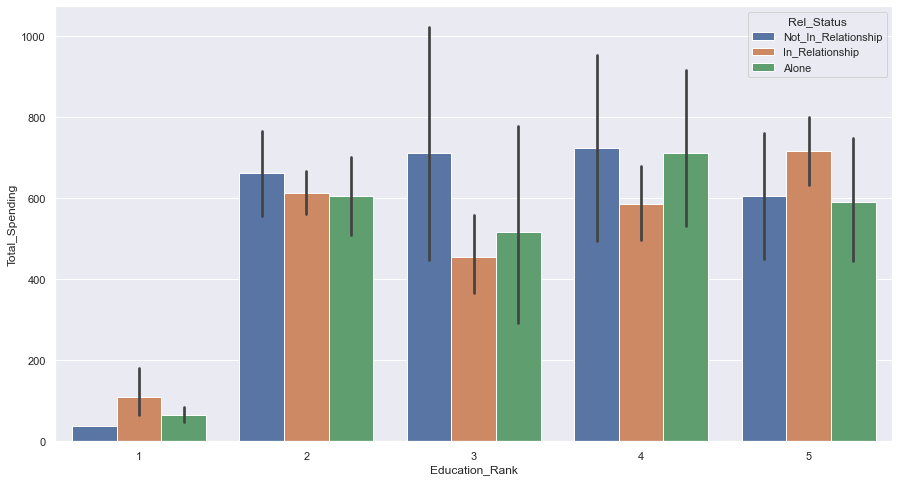

In [217]:
#Educational status of your customers and how they spend
sns.barplot(y= 'Total_Spending', x = 'Education_Rank', hue = 'Rel_Status', data = df, ci = 95)